# Анализ сервиса аренды самокатов GoFast

# Описание проекта

Анализ сервиса аренды самокатов GoFast. В проекте данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить гипотезы.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- **без подписки**
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- **с подпиской Ultra**
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

# Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.
- **Пользователи** — users_go.csv:
    - **user_id** — уникальный идентификатор пользователя;
    - **name** — имя пользователя;
    - **age** — возраст;
    - **city** — город;
    - **subscription_type** — тип подписки (free, ultra).

- **Поездки** — rides_go.csv:
    - **user_id** — уникальный идентификатор пользователя;
    - **distance** — расстояние, которое пользователь проехал в текущей сессии (в метрах);
    - **duration** — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать   поездку» до момента, как он нажал кнопку «Завершить поездку»;
    - **date** — дата совершения поездки.

- **Подписки** — subscriptions_go.csv:
    - **subscription_type** — тип подписки;
    - **minute_price** — стоимость одной минуты поездки по данной подписке;
    - **start_ride_price** — стоимость начала поездки;
    - **subscription_fee** — стоимость ежемесячного платежа.

# План работы

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки
6. Проверка гипотез
7. Общий вывод

## Загрузка данных

### Импорт библиотек

In [1]:
import pandas as pd
import datetime as dt

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

import scipy.stats as st

### Пользователи — users_go.csv

In [2]:
users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


### Поездки — rides_go.csv

In [4]:
rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


### Подписки — subscriptions_go.csv

In [6]:
subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [7]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


### Вывод по загрузке данных

- В датафрейме rides_go.csv столбец date не в формате типа даты pandas, необходимо привести в нудный формат.
- Столбец user_id датафрейма rides_go.csv имеет множество повторов, следовательно, в таблице инофрмация о нескольких поездках пользователей 
- Во всех трех датафреймах отсутствуют пропуски в данных 

## Предобработка данных

###  Датафрейм  rides 

* **Столбец date преобразую в формат datetime**

In [8]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides.info() #проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


* **Добавление нового столбца с номером месяца**

In [9]:
rides['month'] = rides['date'].dt.month
rides[['month', 'date']].head(3) #проверка

,month,date
0,1,2021-01-01
1,1,2021-01-18
2,4,2021-04-20


* **Анализ временного промежутка данных**

In [10]:
print('Данные в датафрейме за период c', rides['date'].min(), 'по', rides['date'].max() )

Данные в датафрейме за период c 2021-01-01 00:00:00 по 2021-12-30 00:00:00


* **Проверка наличия пропущенных значений и дубликатов**

In [11]:
# Проверка наличия пропущенных значений
rides.isna().sum().sort_values(ascending=False)

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [12]:
# вывод дубликтов
rides.loc[rides.duplicated(subset=['user_id','distance'], keep=False)].sort_values(by='user_id')

,user_id,distance,duration,date,month


#### Вывод

В датафрейме rides отсутствуют пропущенные значения и дубликаты. Столбец date преобразован в формат datetime. Добавлен новый столбец с номером месяца. Данные в датафрейме rides за 2021 год с 1 января по 30 декабря. 

###  Датафрейм  users

* **Проверка наличия пропущенных значений**

In [13]:
users.isna().sum().sort_values(ascending=False)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

* **Проверка наличия неявных дубликатов, аномалий в определенных столбцах**

In [14]:
# Получаем уникальные значения из столбца
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [15]:
# Получаем уникальные значения из столбца
users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

### Проверка наличия явных дубликатов и последующее удаление дублирующихся строк

In [17]:
# вывод дубликтов
users.loc[users.duplicated(subset=['user_id'], keep=False)].sort_values(by='user_id').head(4)

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra


In [18]:
# удаление дубликтов
users = users.drop_duplicates()

In [19]:
# проверка
users.duplicated().sum()

0

#### Вывод 

В датафрейме users отсутствуют пропущенные значения. Отсутствуют также неявные дубликаты/опечатки в названиях городов и в столбце `subscription_type`. В стобце с возрастом аномалий не обнаружено. 

В датафрейме users были найдены и удалены дублирующие строки.

###  Вывод по предобработке данных 

**В датафрейме rides**:

                        - отсутствуют пропущенные значения и дубликаты;  
                        - столбец date преобразован в формат datetime;                  
                        - добавлен новый столбец с номером месяца.
                        - данные за 2021 год с 1 января по 30 декабря. 
        
**В датафрейме users**:

                        - отсутствуют пропущенные значения; 
                        - отсутствуют неявные дубликаты/опечатки в названиях городов и в столбце 'subscription_type';
                        - в стобце с возрастом аномалий не обнаружено;
                        - были найдены и удалены дублирующие строки.       

## Исследовательский анализ данных

### Частота встречаемости городов

In [20]:
# Подсчитываем количество вхождений каждого уникального значения
city = users['city'].value_counts()
city

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

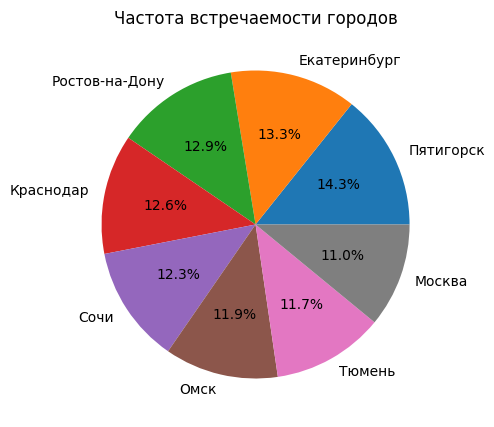

In [21]:
# Строим круговую диаграмму с данными о частоте городов
fig, ax = plt.subplots(figsize =(10, 5))

plt.pie(city, labels=city.index, autopct='%.1f%%');
ax.set(title ="Частота встречаемости городов");

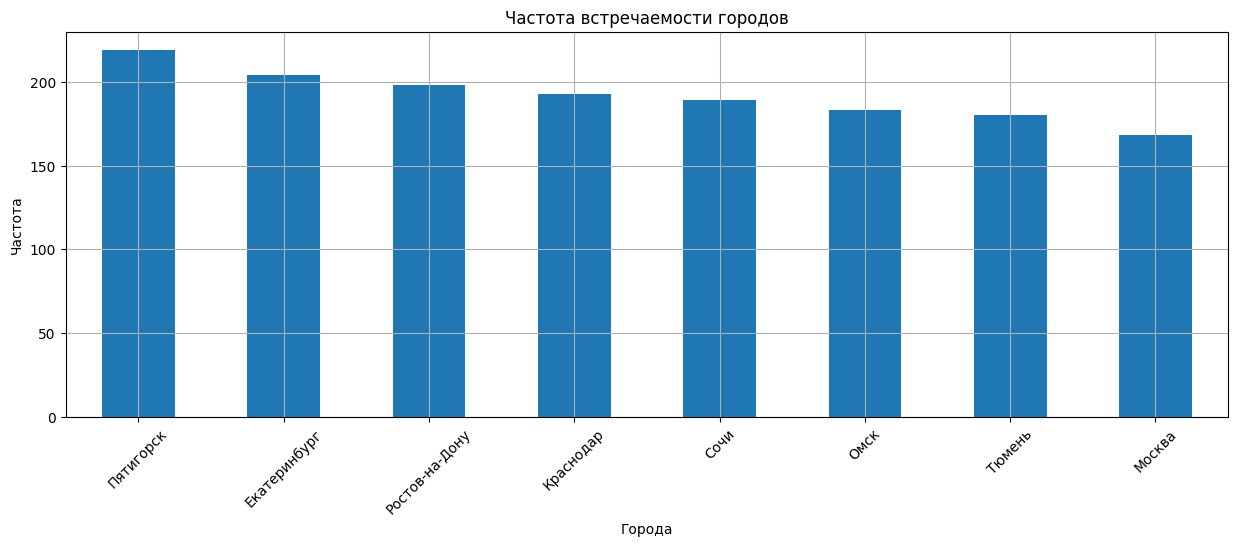

In [22]:
# Строим столбчатую диаграмму для частоты встречаемости городов
users['city'].value_counts() .plot(title='Частота встречаемости городов', kind='bar',figsize=(15, 5))
plt.xlabel('Города')
plt.ylabel('Частота')
plt.grid()
plt.xticks(rotation=45)
plt.show()

#### Вывод

Всего городов 8: Пятигорск, Екатеринбург, Ростов-на-Дону, Краснодар, Сочи, Омск, Тюмень, Москва. 

Города в выборке, в среднем, имеют одинаковую частоту встречаемости: частота варьируется от 11 до 14.3%.

3 самых встречаемых городa это: Пятигорск (14,3%), Екатеринбург (13,3%), Ростов-на-Дону (12,9%), самый менее встречаемый - Москва (11%). 

### Cоотношение пользователей с подпиской и без подписки

In [23]:
# Подсчитываем количество вхождений каждого уникального значения в столбце
subscription_type = users['subscription_type'].value_counts()
subscription_type

subscription_type
free     835
ultra    699
Name: count, dtype: int64

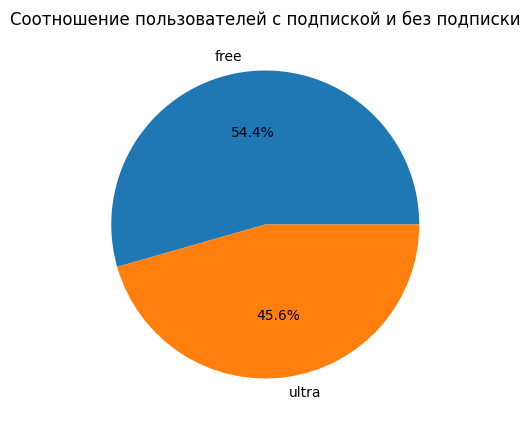

In [24]:
# Строим круговую диаграмму
fig, ax = plt.subplots(figsize =(10, 5))

plt.pie(subscription_type, labels=subscription_type.index, autopct='%.1f%%');
ax.set(title ="Cоотношение пользователей с подпиской и без подписки");

#### Вывод

Количество пользователей с подпиской и без примерно равное количество, но без подписки чуть больше: без подписки 54,4%, с подпиской 45,6%

### Возраст пользователей

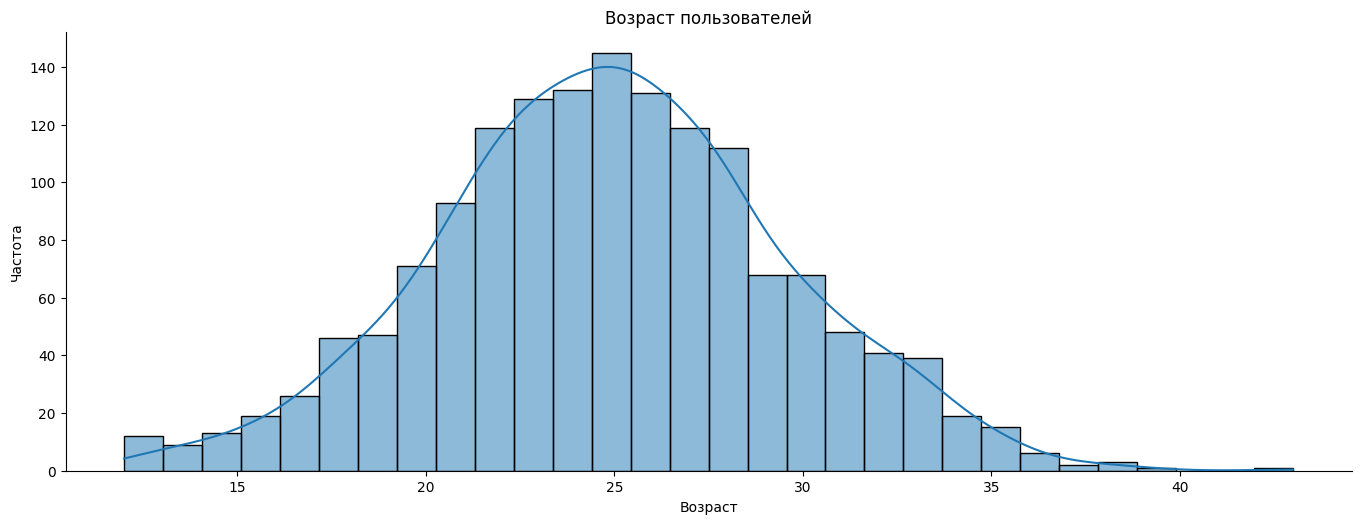

In [25]:
# Строим распределение возраста пользователей
sns.displot(data=users, x='age', height=6, kde=True)
plt.gcf().set_size_inches(15, 5)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота');

In [26]:
print('Самый встречаемый возраст пользователей:',users['age'].median())
print('Средний возраст пользователей:',users['age'].mean().round(2))
print('Самый молодой пользователь:',users['age'].min(), 'лет')
print('Самый старший пользователь:',users['age'].max(), 'года')

Самый встречаемый возраст пользователей: 25.0
Средний возраст пользователей: 24.9
Самый молодой пользователь: 12 лет
Самый старший пользователь: 43 года


In [27]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [28]:
#функция распределения возраста пользователей по категориям

def categorize_age(age): 
    try:
        if age < 18:
            return 'до 18 лет'
        elif 18 <= age <= 25:
            return '18-25 лет'
        elif 25 < age <= 30:
            return '25-30 лет'
        elif 30 < age <= 35:
            return '30-35 лет'
        elif age > 35:
            return '35+'
    except:
        pass

In [29]:
# применяем функцию
age_category = users['age'].apply(categorize_age)
age_category = age_category.value_counts()
age_category

age
18-25 лет    782
25-30 лет    498
30-35 лет    162
до 18 лет     79
35+           13
Name: count, dtype: int64

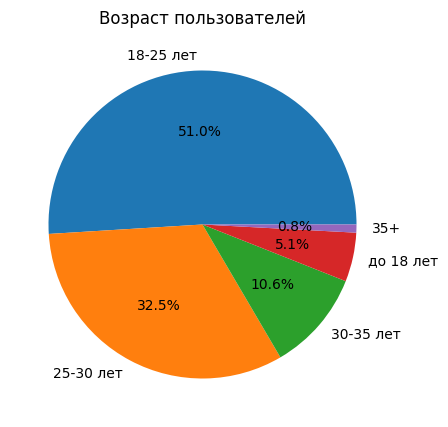

In [30]:
# Строим круговую диаграмму
fig, ax = plt.subplots(figsize =(10, 5))
plt.pie(age_category, labels=age_category.index, autopct='%.1f%%');
plt.title('Возраст пользователей');

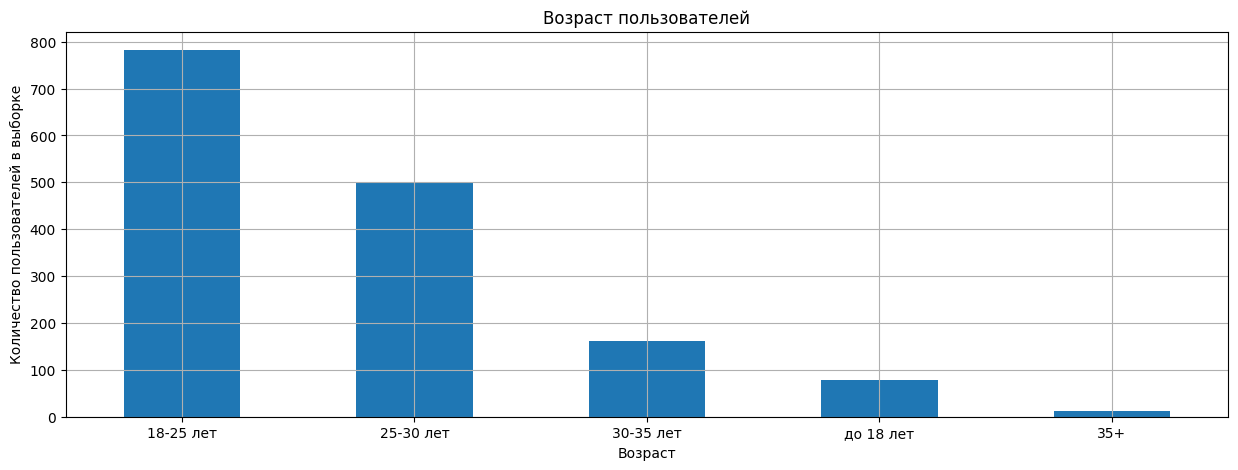

In [31]:
# Строим столбчатую диаграмму
age_category.plot(title='Возраст пользователей', kind='bar',figsize=(15,5))
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей в выборке')
plt.grid()
plt.xticks(rotation=0)
plt.show()

#### Вывод

Возраст пользователей варьируется от 12 до 43 лет. Средний и  самый часто встречаемый возраст пользователей - 25 лет.
Половина пользователей имеют возраст 18-25 лет (51%), вторая большая категория - это 25-30 лет - 32,5% пользователей.
В категории 30-35 лет - 10,6% пользоваталей, до 18 лет - 5.1%, от 35 - 0,8%. 

### Расстояние, которое пользователь преодолел за одну поездку

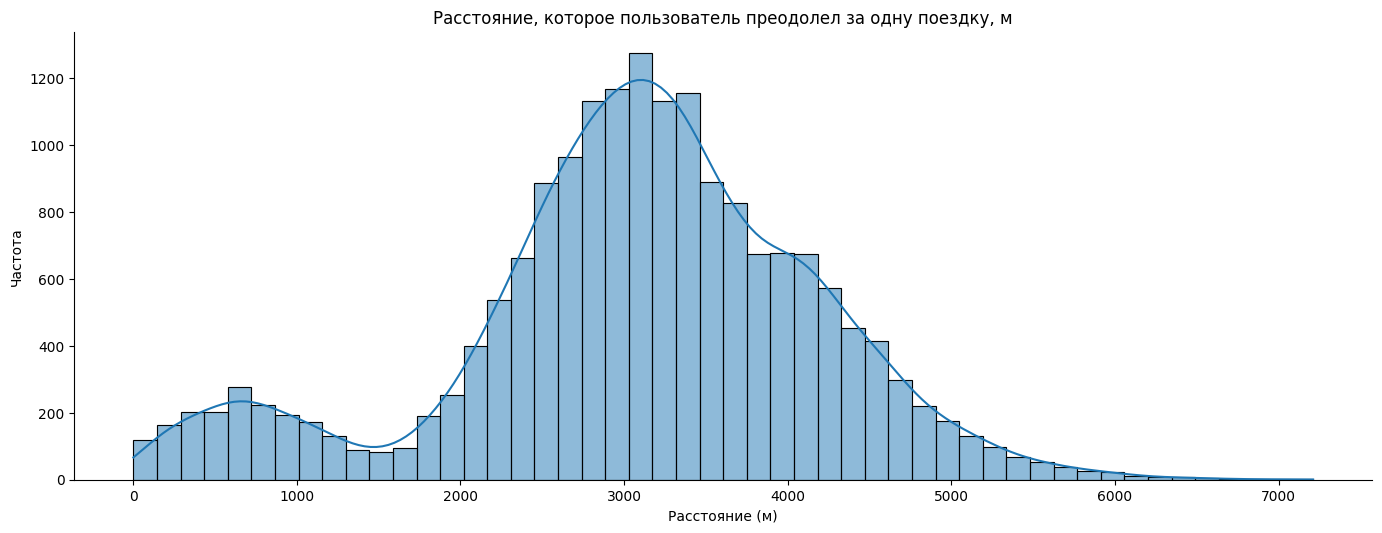

In [32]:
# Строим распределение расстояния, преодоленного пользователями за одну поездку
sns.displot(data=rides, x='distance', bins=50, height=7, kde=True)
plt.gcf().set_size_inches(15, 5)
plt.title('Расстояние, которое пользователь преодолел за одну поездку, м')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота');

In [33]:
print('Среднее расстояние, которое пользователь преодолел за одну поездку:', rides['distance'].mean().round(2), 'м')

Среднее расстояние, которое пользователь преодолел за одну поездку: 3070.66 м


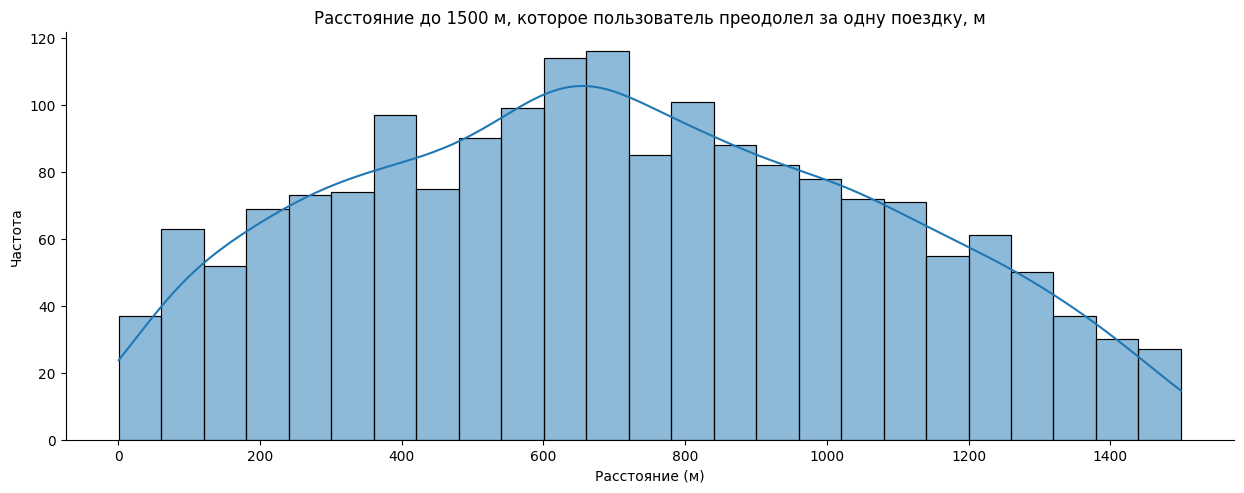

In [34]:
# Строим распределение расстояния до 1500 м, преодоленного пользователями за одну поездку
sns.displot(data=rides.query('distance < 1500'), x='distance', bins=25, height=4, kde=True)
plt.gcf().set_size_inches(15, 5)
plt.title('Расстояние до 1500 м, которое пользователь преодолел за одну поездку, м')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота');

In [35]:
print('Медианное расстояние, которое пользователь преодолел за одну поездку (менее 1500 м):', rides.query('distance<1500')['distance'].median().round(1), 'м')

Медианное расстояние, которое пользователь преодолел за одну поездку (менее 1500 м): 687.5 м


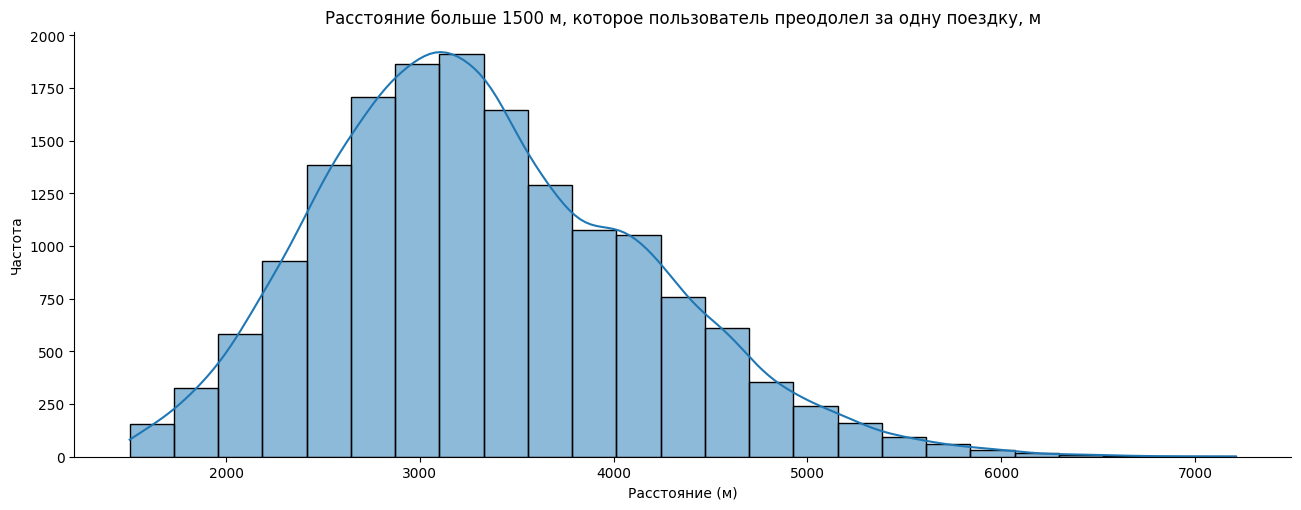

In [36]:
# Строим распределение расстояния больше 1500 м, преодоленного пользователями за одну поездку
sns.displot(data=rides.query('distance > 1500'), x='distance', bins=25, height=5, kde=True)
plt.gcf().set_size_inches(15, 5)
plt.title('Расстояние больше 1500 м, которое пользователь преодолел за одну поездку, м')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота');

In [37]:
print('Медианное расстояние, которое пользователь преодолел за одну поездку (более 1500 м):', rides.query('distance>1500')['distance'].median().round(1), 'м')

Медианное расстояние, которое пользователь преодолел за одну поездку (более 1500 м): 3240.0 м


In [38]:
print('Процент пользователей, предпочитающих длительные дистанции (более 1500 м):', round(rides.query('distance>1500')['distance'].count()/rides['distance'].count()*100,2), '%')

Процент пользователей, предпочитающих длительные дистанции (более 1500 м): 90.06 %


#### Вывод

В среднем, пользователи проезжают дистанцию в 3,07км

Пользователи, предпочитают:  
 - короткие дистанции до 1,5км - в среднем ≈700 метров, 
 - длительные дистации от 1,5км до 7км, в основном, ≈3,2км.  
 
Длительные дистанции предпочитают 90% пользователей.

### Продолжительность поездок

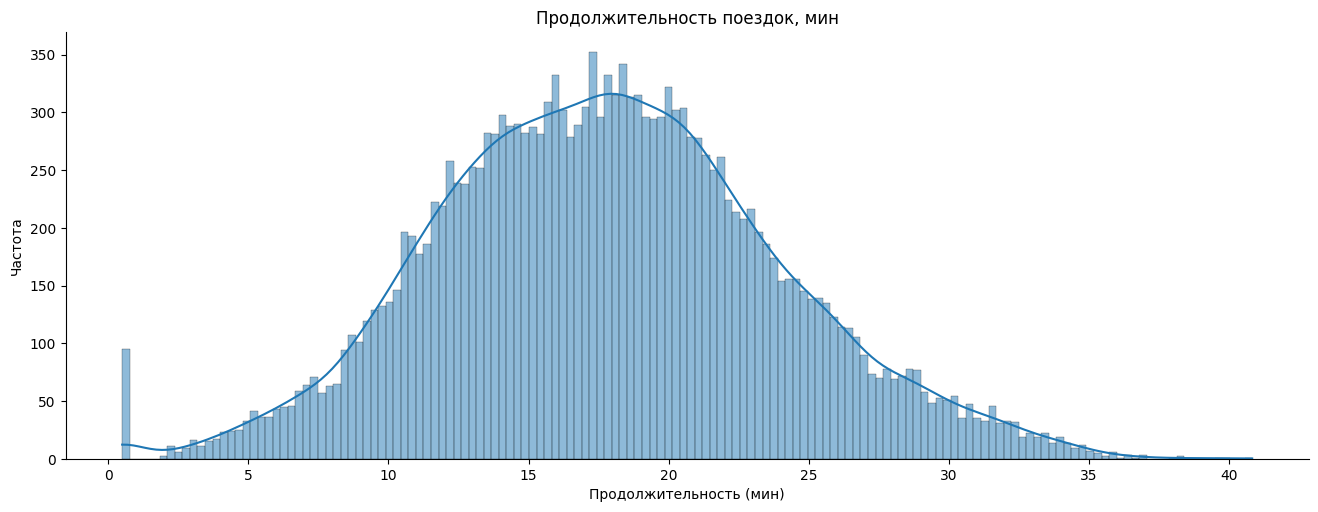

In [39]:
# Строим распределение продолжительности поездок
sns.displot(data=rides, x='duration', bins=150, height=5, kde=True)
plt.gcf().set_size_inches(15, 5)
plt.title('Продолжительность поездок, мин')
plt.xlabel('Продолжительность (мин)')
plt.ylabel('Частота');

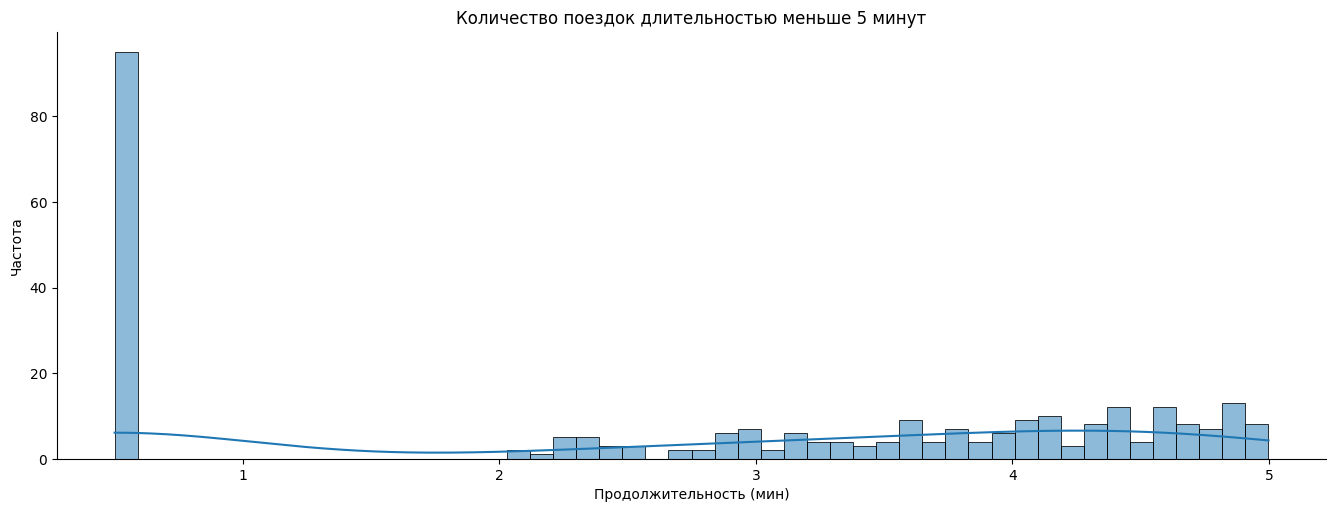

In [40]:
# Строим распределение количества поездок длительностью менее 5 минут
sns.displot(data=rides.query('duration < 5'), x='duration', bins=50, height=5, kde=True)
plt.gcf().set_size_inches(15, 5)
plt.title('Количество поездок длительностью меньше 5 минут')
plt.xlabel('Продолжительность (мин)')
plt.ylabel('Частота');

In [41]:
# Подсчитываем количество поездок длительностью менее 1 минуты
rides.query('duration<1')['duration'].value_counts()

duration
0.5    95
Name: count, dtype: int64

In [42]:
# Печатаем процент ошибочно завершенных поездок
print('Процент ошибочно завершенных поездок (длительность менее 1 минуты):', round(rides.query('duration<1')['duration'].count()/rides['duration'].count()*100,2), '%')

Процент ошибочно завершенных поездок (длительность менее 1 минуты): 0.53 %


In [43]:
print('Медианная продолжительность поездок:', rides['duration'].median().round(1), 'мин')

Медианная продолжительность поездок: 17.7 мин


#### Вывод

Средняя продолжительность поездок 17,7 минут. 

Процент ошибочно завершенных поездок (поездок длительность до 0,5мин): 0,5%

### Вывод по исследовательскому анализу данных

**1)** Представлена информация о пользователей сервиса из восьми городов: Пятигорск, Екатеринбург, Ростов-на-Дону, Краснодар, Сочи, Омск, Тюмень, Москва.

Города в выборке, в среднем, имеют одинаковую частоту встречаемости: частота варьируется от 11 до 14.3%. 
     
3 самых встречаемых городa это: Пятигорск (14,3%), Екатеринбург (13,3%), Ростов-на-Дону (12,9%), самый реже встречаемый - Москва (11%).

**2)** Пользователей без подписки 54,4%, с подпиской 45,6%

**3)** Возраст пользователей варьруется от 12 до 43 лет. Средний возраст - 25 лет. 

   Возраст пользователей можно разделить на 5 категорий: 

       - 18-25 лет - 51% всех пользоваталей сервиса;
       - 25-30 лет - 32,5%;
       - 30-35 лет - 10,6%;
       - до 18 лет - 5.1%; 
       - от 35 - 0,8%.

**4)** Пользователи, предпочитают:

 - короткие дистанции до 1,5км - в среднем 700 метров,
 - длительные дистации от 1,5км до 7км - в среднем 3,2км
 
Длительные дистанции предпочитают 90% пользователей.

**5)** Средняя продолжительность поездок 17,7 минут.

Процент ошибочно завершенных поездок (поездок длительность до 0,5мин): 0,5%


## Объединение данных

### Объединение данных о пользователях, поездках и подписках в один датафрейм

In [44]:
data = rides.merge(users, on='user_id', how='left')
data.head(3)

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra


### Создание датафрейма с данными о пользователях с подпиской

In [45]:
data_ultra = data.query('subscription_type == "ultra"')
data_ultra.tail(3)

,user_id,distance,duration,date,month,name,age,city,subscription_type
6497,699,3076.159348,14.389525,2021-09-26,9,Оксана,22,Москва,ultra
6498,699,4707.845501,15.839579,2021-10-17,10,Оксана,22,Москва,ultra
6499,699,3202.890770,25.217345,2021-12-03,12,Оксана,22,Москва,ultra


### Создание датафрейма c данными о пользователях без подписки

In [46]:
data_free = data.query('subscription_type == "free"')
data_free.tail(3)

,user_id,distance,duration,date,month,name,age,city,subscription_type
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free
18067,1534,2371.711192,15.893917,2021-12-29,12,Альберт,25,Краснодар,free


In [47]:
print('Количество строк в data:', data.shape[0])
print('Количество строк в data_free:', data_free.shape[0])
print('Количество строк в data_ultra:', data_ultra.shape[0])

Количество строк в data: 18068
Количество строк в data_free: 11568
Количество строк в data_ultra: 6500


### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий

#### Анализ пройденного расстояния пользователей с подпиской

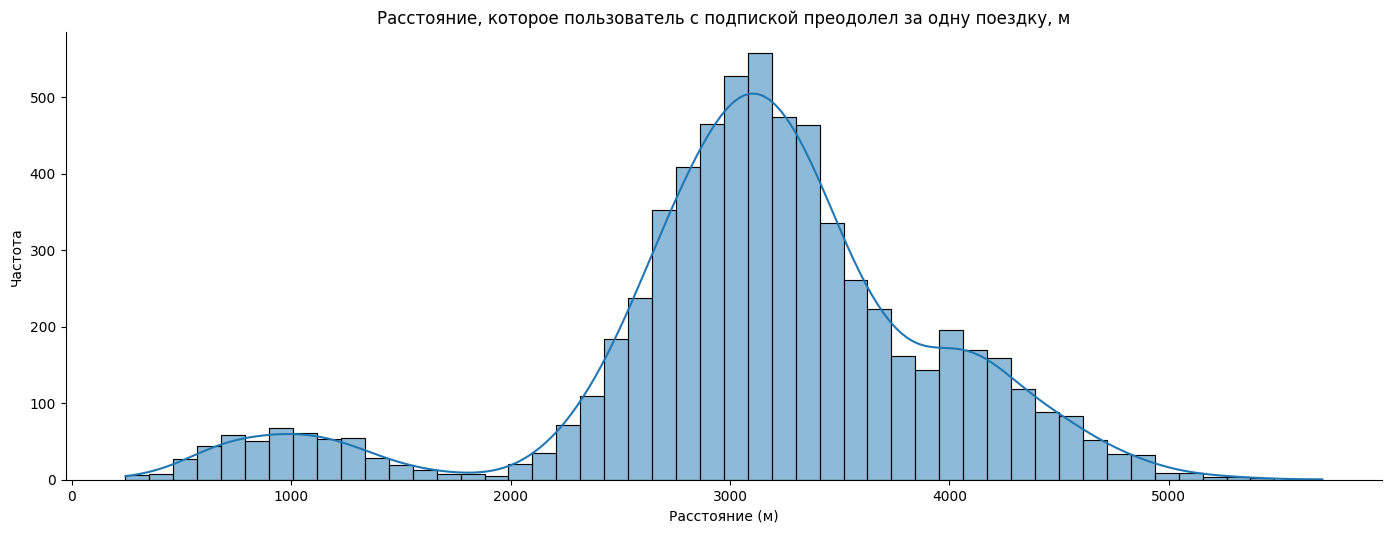

In [48]:
# Строим распределение расстояния, преодоленного пользователями с подпиской
sns.displot(data=data_ultra, x='distance',bins=50, height=7, kde=True);
plt.gcf().set_size_inches(15, 5)
plt.title('Расстояние, которое пользователь с подпиской преодолел за одну поездку, м')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота');

In [49]:
print('Среднее расстояние, которое пользователь с подпиской преодолел за одну поездку:', data_ultra.distance.mean(), 'м')

Среднее расстояние, которое пользователь с подпиской преодолел за одну поездку: 3115.4453880370247 м


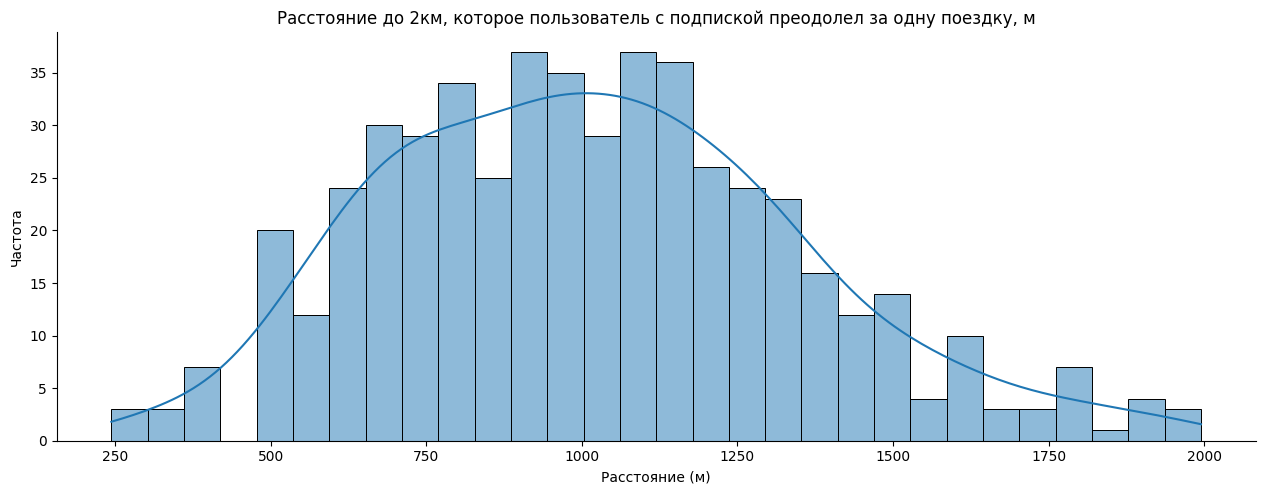

In [50]:
# Строим распределение расстояния до 2000 м, преодоленного пользователями с подпиской
sns.displot(data=data_ultra.query('distance<2000'), x='distance',bins=30, height=4, kde=True);
plt.gcf().set_size_inches(15, 5)
plt.title('Расстояние до 2км, которое пользователь с подпиской преодолел за одну поездку, м')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота');

In [51]:
print('Средняя длина малой дистанции (до 2 км) для пользоваателей с подпиской:', round(data_ultra.query('distance<2000')['distance'].median()/1000,2), 'м')

Средняя длина малой дистанции (до 2 км) для пользоваателей с подпиской: 0.99 м


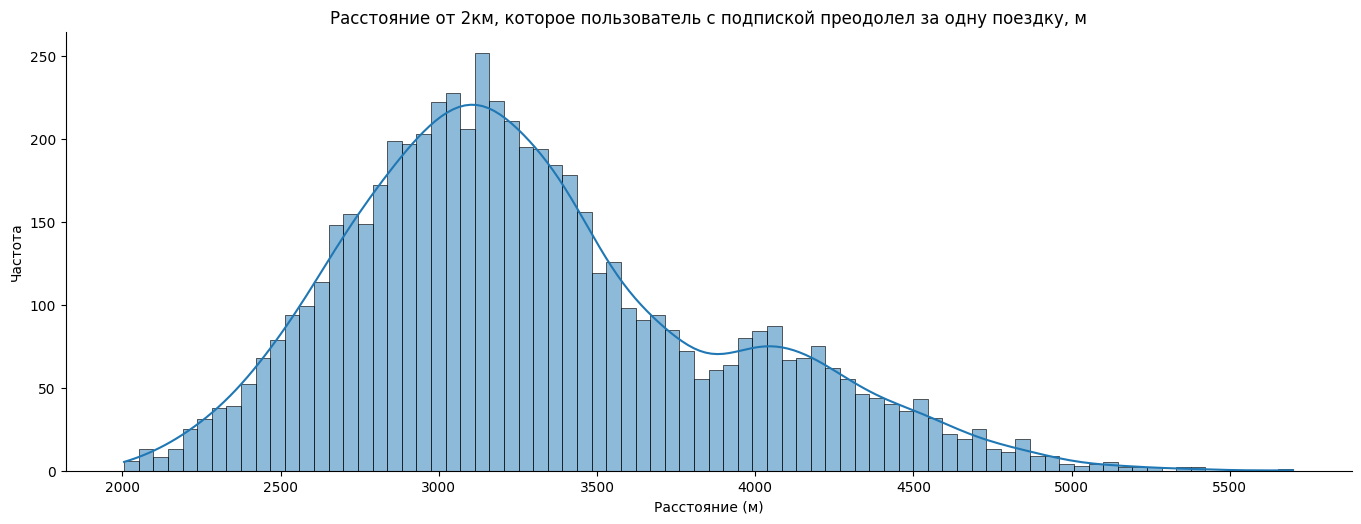

In [52]:
# Строим распределение
sns.displot(data=data_ultra.query('distance>2000'), x='distance',bins=80, height=6, kde=True)

plt.gcf().set_size_inches(15, 5)
plt.title('Расстояние от 2км, которое пользователь с подпиской преодолел за одну поездку, м')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота');

In [53]:
print('Средняя длина большей дистанции (от 2 км) для пользоваателей с подпиской:', round(data_ultra.query('distance>2000')['distance'].median()/1000,2), 'км')

Средняя длина большей дистанции (от 2 км) для пользоваателей с подпиской: 3.2 км


**Пользователи с подпиской** зачастую преодолевают расстояние в 3,2км, в меньшей степени предпочитают короткие дистанции в 0,99км и длинные - в 4км. 

#### Анализ пройденного расстояния пользователей без подписки

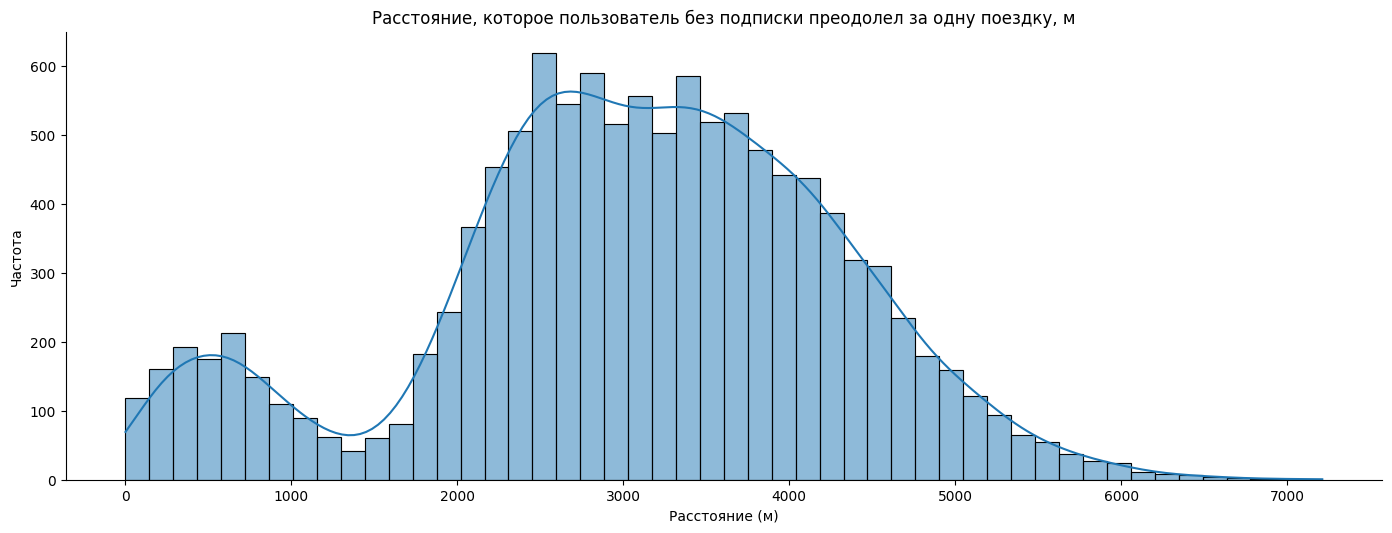

In [54]:
# Строим распределение расстояния
sns.displot(data=data_free, x='distance',bins=50, height=7, kde=True)

plt.gcf().set_size_inches(15, 5)
plt.title('Расстояние, которое пользователь без подписки преодолел за одну поездку, м')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота');

In [55]:
print('Среднее расстояние, которое пользователь без подписки преодолел за одну поездку:', data_free.distance.mean().round(1), 'м')

Среднее расстояние, которое пользователь без подписки преодолел за одну поездку: 3045.5 м


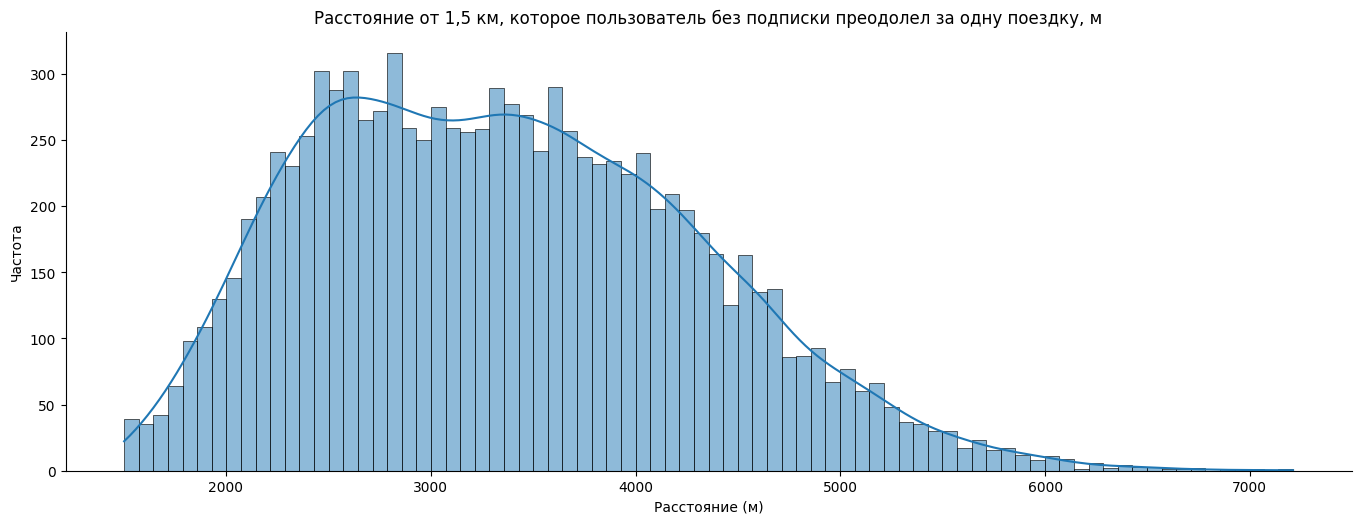

In [56]:
# Строим распределение расстояния более 1500 м, преодоленного пользователями без подписки
sns.displot(data=data_free.query('distance > 1500'), x='distance', bins=80, height=6, kde=True)

plt.gcf().set_size_inches(15, 5)
plt.title('Расстояние от 1,5 км, которое пользователь без подписки преодолел за одну поездку, м')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота');

In [57]:
print('Средняя длина большей дистанции (от 1,5 км) для пользоваателей с подпиской:', round(data_free.query('distance>1500')['distance'].median()/1000,1), 'км')

Средняя длина большей дистанции (от 1,5 км) для пользоваателей с подпиской: 3.3 км


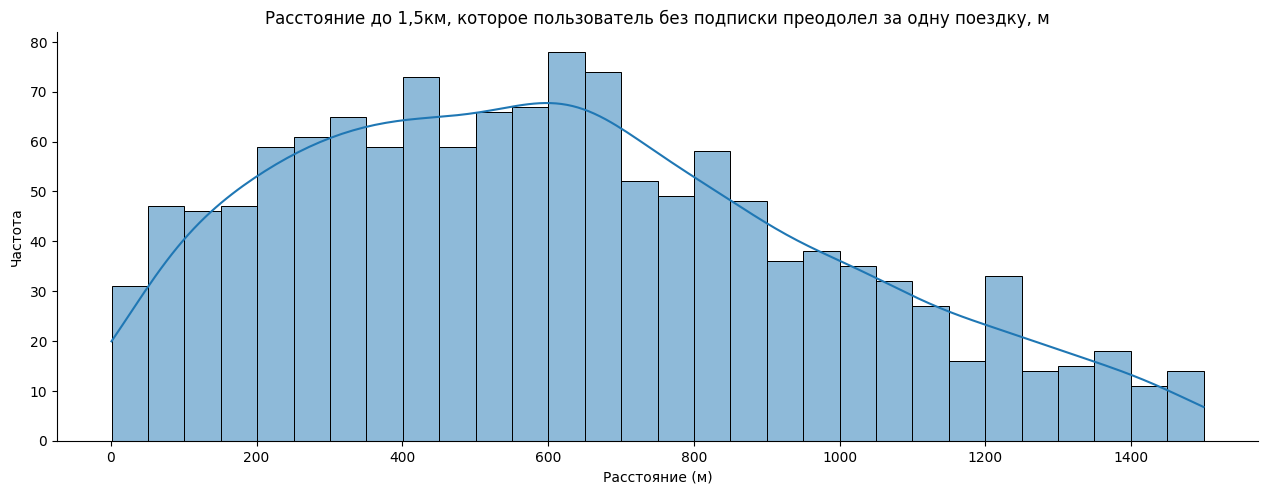

In [58]:
# Строим распределение расстояния
sns.displot(data=data_free.query('distance<1500'), x='distance',bins=30, height=4, kde=True)

plt.gcf().set_size_inches(15, 5)
plt.title('Расстояние до 1,5км, которое пользователь без подписки преодолел за одну поездку, м');
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота');

In [59]:
print('Средняя длина малой дистанции (до 1,5 км) для пользоваателей без подписки:', round(data_free.query('distance<1500')['distance'].median()/1000,1), 'км')

Средняя длина малой дистанции (до 1,5 км) для пользоваателей без подписки: 0.6 км


**Пользователи без подписки** в среднем преодолевают 3,3км, также предпочитают небльшие дистанциии около 0,6км

#### Анализ продолжительности поездок пользователей с подпиской

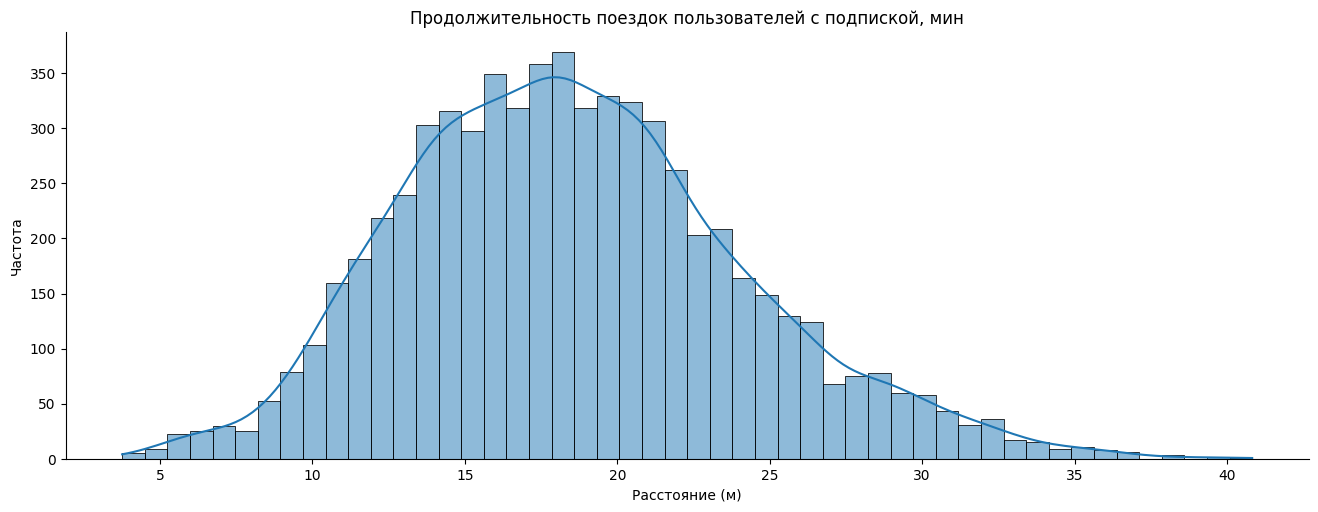

In [60]:
# Строим распределение расстояния
sns.displot(data=data_ultra, x='duration',bins=50, height=5, kde=True)

plt.gcf().set_size_inches(15, 5)
plt.title('Продолжительность поездок пользователей с подпиской, мин')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота');

In [61]:
print("Средняя продолжительность поездок пользователей с подпиской:", round(data_ultra['duration'].median(), 1), "мин")

Средняя продолжительность поездок пользователей с подпиской: 18.2 мин


#### Анализ продолжительности поездок пользователей без подписки

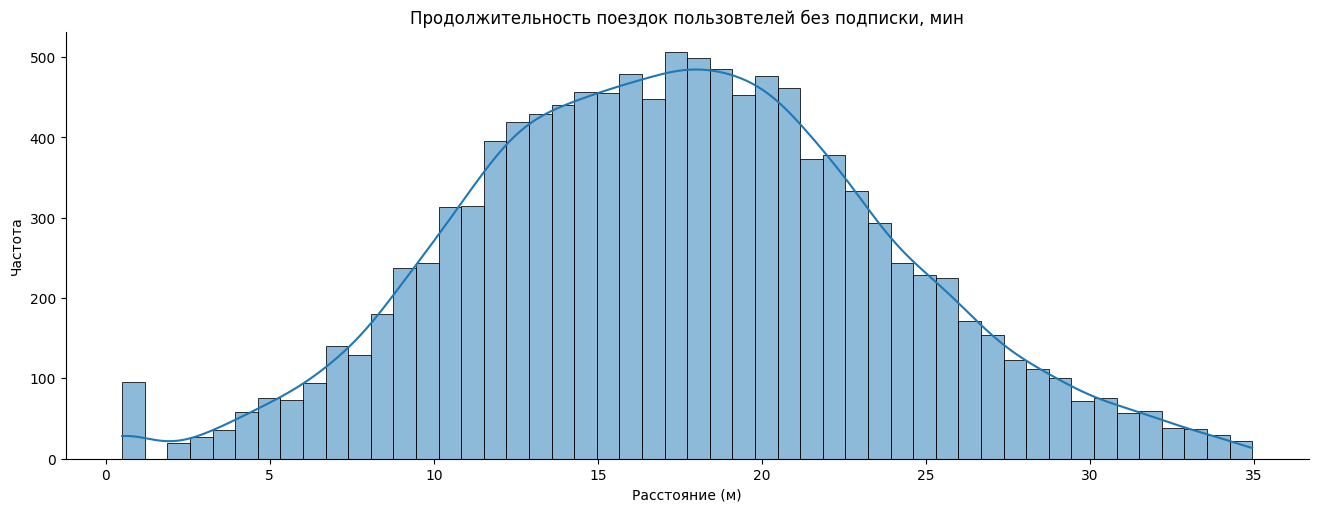

In [62]:
# Строим распределение расстояния
sns.displot(data=data_free, x='duration',bins=50, height=5, kde=True)

plt.gcf().set_size_inches(15, 5)
plt.title('Продолжительность поездок пользовтелей без подписки, мин')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота');

In [63]:
print("Средняя продолжительность поездок пользователей без подписки:", data_free['duration'].median().round(1), "мин")

Средняя продолжительность поездок пользователей без подписки: 17.3 мин


Ошибочно завершают поездки сразу после старта только пользователи без подписки

In [64]:
print('Средняя продолжительность поездок пользователей с подпиской на', round(1-17.3/18.2, 2), '% больше, чем для пользователей без подписки')

Средняя продолжительность поездок пользователей с подпиской на 0.05 % больше, чем для пользователей без подписки


### Вывод

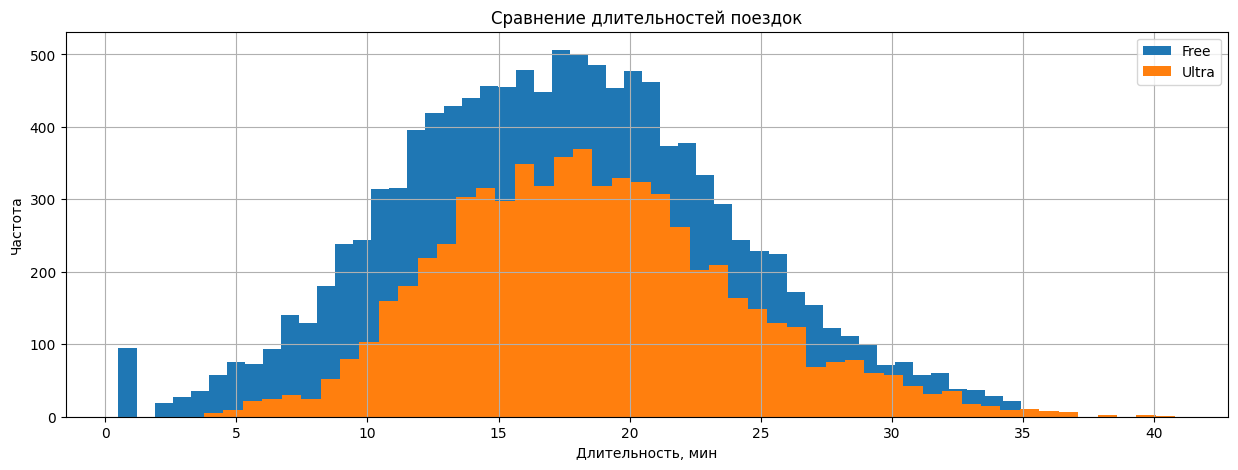

In [65]:
# Строим распределение
plt.figure(figsize = (15, 5))
data_free['duration'].hist(bins = 50, label = 'Free')
data_ultra['duration'].hist(bins = 50, label = 'Ultra')
plt.title('Сравнение длительностей поездок')
plt.xlabel('Длительность, мин')
plt.ylabel('Частота')
plt.legend()
plt.show()

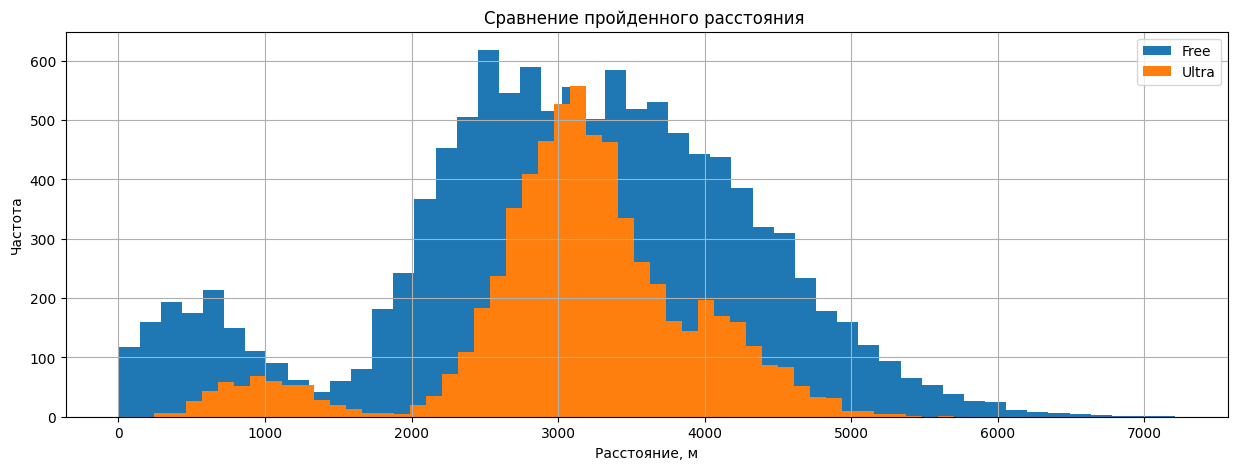

In [66]:
# Строим распределение
plt.figure(figsize = (15, 5))
data_free['distance'].hist(bins = 50, label = 'Free')
data_ultra['distance'].hist(bins = 50, label = 'Ultra')
plt.title('Сравнение пройденного расстояния ')
plt.xlabel('Расстояние, м')
plt.ylabel('Частота')
plt.legend()
plt.show()

**1)** Данные о пользователях, поездках и подписках объеденены в один датафрейм

**2)** Созданы отдельные датафреймы с данными о пользователях с подпиской и без подписки

**3)** Визуализирована информации о расстоянии и времени поездок для пользователей обеих категорий:
   
   **Пользователи с подпиской** В среднем преодолевают дистанцию в 3,12 км. Предпочитают длительные поездки в 3,3км, в меньшей степени - короткие дистанции в 0,99км и длинные - в 4км. Средняя продолжительность поездок: 18.2 мин;
       
   **Пользователи без подписки** В среднем преодолевают дистанцию в 3,05 км. Предпочитают длительные поездки 3,3км, также предпочитают небольшие дистанциии около 0,6км. Средняя продолжительность поездок: 17.3 мин.

Средняя продолжительность поездок пользователей с подпиской на 0.05 % больше, чем для пользователей без подписки

## Подсчёт выручки

### Создание датафрейма с агрегированными данными о поездках 

Новый датафрейм data_gain на основе датафрейма с объединёнными данными: суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

In [67]:
# вывод первых трек строк датафрейма с объединёнными данными
data.head(3) 

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra


In [68]:
# каждое значение из столбца duration округляется с помощью «потолка»:
data['duration'] = np.ceil(data['duration'])

In [69]:
data.head(3) #проверка округления 

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,26.0,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,16.0,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,7.0,2021-04-20,4,Кира,22,Тюмень,ultra


In [70]:
# создание датафрейма с агрегированными данными о поездках

data_gain = data.groupby(['user_id','month','subscription_type']) \
            .agg({'date': 'count',
                  'distance': 'sum',
                  'duration': 'sum',
                 }).reset_index()

# вывод первых трек строк
data_gain.head(3) 

,user_id,month,subscription_type,date,distance,duration
0,1,1,ultra,2,7027.511294,42.0
1,1,4,ultra,1,754.159807,7.0
2,1,8,ultra,2,6723.470560,46.0


Столбец `date` теперь содержат данные о количестве поездок, совершенных пользователем за месяц

### Добавление столбцов с помесячной выручкой, которую принёс каждый пользователь

Учтена информация об условиях оплаты для подписчиков и тех у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа 

In [71]:
# датафрейм с информацией об условиях оплаты для подписчиков:
subscriptions.head() 

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [72]:
# Вычисляем прибыль для пользователей в зависимости от их типа подписки
data_gain['gain'] = data_gain['duration'] * 8 + data_gain['date'] * 50

# Для пользователей с подпиской 'ultra' пересчитываем прибыль по другой формуле
data_gain.loc[data_gain['subscription_type'] == 'ultra', 'gain'] = data_gain['duration'] * 6 + 199

In [73]:
data_gain.head(7) #вывод первых семи строк датафрейма с агрегированными данными о поездках

,user_id,month,subscription_type,date,distance,duration,gain
0,1,1,ultra,2,7027.511294,42.0,451.0
1,1,4,ultra,1,754.159807,7.0,241.0
2,1,8,ultra,2,6723.470560,46.0,475.0
3,1,10,ultra,2,5809.911100,32.0,391.0
4,1,11,ultra,3,7003.499363,56.0,535.0
5,1,12,ultra,2,6751.629942,28.0,367.0
6,2,3,ultra,3,10187.723006,63.0,577.0


In [74]:
data_gain.tail(7) #вывод последних семи строк датафрейма с агрегированными данными о поездках

,user_id,month,subscription_type,date,distance,duration,gain
11324,1534,2,free,1,2103.914120,14.0,162.0
11325,1534,4,free,1,3434.290912,15.0,170.0
11326,1534,6,free,2,3409.468534,26.0,308.0
11327,1534,8,free,2,7622.453034,48.0,484.0
11328,1534,9,free,1,4928.173852,23.0,234.0
11329,1534,11,free,4,13350.015305,78.0,824.0
11330,1534,12,free,1,2371.711192,16.0,178.0


Новый столбец `gain` - столбец с помесячной выручкой, которую принёс пользователь

Создан датафрейм data_gain с агрегированными данными о поездках на основе датафрейма с объединёнными данными.
В этот же датафрейм добавлен столбец `gain` с помесячной выручкой, которую принёс каждый пользователь. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа.

In [75]:
# Вычисляем среднюю прибыль для каждого типа подписки
data_gain.groupby('subscription_type')['gain'].mean().round()

subscription_type
free     329.0
ultra    363.0
Name: gain, dtype: float64

## Проверка гипотез

### Анализ времени, проведенного пользователями с подпиской и без подписки на поездки

- **Нулевая гипотеза**: Среднее время поездки пользователей с подпиской и без равны

  **Альтернативная гипотеза**: Пользователи с подпиской тратят больше времени на поездки.
  
   
- **Выборки**:
  - Время, которое тратит на поездки пользователи с подпиской **ultra_duration_total**
  - Время, которое тратят на поездки пользователи без подписки **free_duration_total**

In [76]:
# уровень значимости
alpha = 0.05

# продолжительность поездки пользователей с подпиской
ultra_duration_total = data_ultra['duration']

# продолжительность поездки пользователей без подпиской
free_duration_total = data_free['duration']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу "меньше"
results = st.ttest_ind(ultra_duration_total, free_duration_total, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2804098316645613e-34
Отвергаем нулевую гипотезу


Также согласно выводу п.4.5:

Средняя продолжительность поездок:

пользователей с подпиской: 18.2 мин;
пользователей без подписки: 17.3 мин

Продолжительность поездок пользователей с подпиской на 0.05 % больше, чем для пользователей без подписки

#### Вывод 

При проверки гипотезы полученное значение p-value меньше заданного уровня значимости, поэтому нулевая гипотеза о том, что среднее время поездки пользователей с подпиской и без равны - отвергнута. Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки.
Можно предположить, что пользователи с подпиской могут быть «выгоднее» для компании.

### Проверка гипотезы о том, будет ли помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

- **Нулевая гипотеза**: Средняя помесячная выручка от пользователей с подпиской и без равны

  **Альтернативная гипотеза**: Средняя помесячная выручка от пользователей с подпиской больше, чем выручка от пользователей без подписки.
  
   
- **Выборки**:
  - Помесячная выручка от пользователей с подпиской ultra_gain_total
  - Помесячная выручка от пользователей без подписки free_gain_total

In [77]:
# уровень значимости
alpha = 0.05

# помесячная выручка от пользователей с подпиской
ultra_gain_total = data_gain.query('subscription_type == "ultra"')['gain']

# помесячная выручка от пользователей без подписки
free_gain_total = data_gain.query('subscription_type == "free"')['gain']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу "меньше"
results = st.ttest_ind(ultra_gain_total, free_gain_total, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


In [78]:
print('Среднее количество поездок в месяц для пользователей без подписки:', round(data_gain.query('subscription_type == "free"')['date'].mean(),2))
print('Среднее количество поездок в месяц для пользователей c подпиской:', round(data_gain.query('subscription_type == "ultra"')['date'].mean(),2))

Среднее количество поездок в месяц для пользователей без подписки: 1.7
Среднее количество поездок в месяц для пользователей c подпиской: 1.43


In [79]:
#Средняя выручка в месяц за одного пользователя c подпиской  и без

data_gain.groupby('subscription_type')['gain'].mean()

subscription_type
free     328.641365
ultra    362.792191
Name: gain, dtype: float64

In [80]:
print('Средняя выручка в месяц за одного пользователя с подпиской на', round(1-328.6/362.8, 2), '% больше, чем для пользователей без подписки')

Средняя выручка в месяц за одного пользователя с подпиской на 0.09 % больше, чем для пользователей без подписки


Даже с учетом, что в среднем пользователи без подписки чаще совершают поездки в течение месяца (1,7 поездки и 1,4 соответственно), **средняя месячная выручка для пользователя с подпиской на 0,09% выше выручки пользователя без подписки**

#### Вывод 

При проверки гипотезы полученное значение p-value меньше заданного уровня значимости, поэтому нулевая гипотеза о том, что средняя выручка пользователей с подпиской и без равны - отвергнута. Есть основания говорить, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
Можно предположить, что пользователи с подпиской могут быть «выгоднее» для компании.

Также если анализировать выборку, можно сказать, что даже с учетом, что в среднем пользователи без подписки чаще совершают поездки в течение месяца (1,7 поездки и 1,4 соответственно), средняя месячная выручка для пользователя с подпиской на 0,09% выше выручки пользователя без подписки

### Анализ расстояния, проезжаемого пользователями с подпиской за одну поездку, и его соответствия оптимальному значению

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Нулевая гипотеза: среднее количество просмотренных блоков после изменения дизайна осталось прежним.
Альтернативная гипотеза: среднее количество просмотренных блоков после изменения дизайна уменьшилось.


- **Нулевая гипотеза**: Среднее расстояние, которое проезжает пользователь с подпиской оптимально с точки зрения исноса самоката и равно 3130 м

  **Альтернативная гипотеза**: Среднее расстояние, которое проезжает пользователь с подпиской больше 3130 м
  
   
- **Выборка**: расстояние, которое проезжают пользователи с подпиской ultra_distance_total

In [81]:
ultra_distance_total = data_ultra['distance']

optimal_value = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    ultra_distance_total, 
    optimal_value,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Согласно выводу п.4.5:

**Пользователи с подпиской** В среднем преодолевают дистанцию в 3,12 км. Часто предпочитают длительные поездки в 3,3км, в меньшей степени - короткие дистанции в 0,99км и длинные - в 4км;
       
**Пользователи без подписки** В среднем преодолевают дистанцию в 3,05 км. Часто предпочитают длительные поездки 3,3км, также предпочитают небольшие дистанциии около 0,6км.

Пользователи с подпиской, в среднем, преодолевают расстояние равное оптимальному (3.12км) с точки зрения износа. 

#### Вывод

При проверки гипотезы полученное значение p-value в пределах заданного уровня значимости. Есть основания говорить, что среднее расстояние, преодолеваемое пользователями с подпиской, равно оптимальному с точки зрения износа. 

Анализ выборки также указывает на то, что среднее расстояние пользователей с подпиской равно оптимальному. 

### Ответ на вопрос технической команды сервиса

Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Необходимо определить, какой тест понадобится бы для проверки этой гипотезы

Гипотезы в таком случае будут сформулированы так:
 - Количество обращений в тех.поддержку не изменилось после обновления серверов (μ1 = μ2)
 - Количество обращений в тех.поддержку изменилось после обновления серверов  (μ1 != μ2)
 
 ,
где μ1 и μ2  — средние значения до и после изменения.

Выборки будут парными. Данные о пользователях измеряются дважды — до и после обновление серверов.
Чтобы проверить гипотезу о равенстве средних двух генеральных совокупностей для зависимых выборок в Python, используется метод scipy.stats.ttest_rel().
Небходимо передать два параметра: наборы данных до и после. Оба набора должны быть одинаковыми по размеру: каждое измерение должно быть проведено до и после изменения. Гипотеза двусторонняя 

### Вывод по проверке гипотез

1) Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки.
   
   
2) Есть основания говорить, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

При анализе выборки сделаны следующие выводы: 
  - продолжительность поездок пользователей с подпиской на 0.05 % больше, чем для пользователей без подписки;
  - средняя месячная выручка для пользователя без подписки на 0,24% выше выручки пользователя с подпиской


Можно предположить, что пользователи с подпиской могут быть «выгоднее» для компании. 

3) Есть основания говорить, что среднее расстояние, преодолеваемое пользователями с подпиской, равно оптимальному с точки зрения износа.

## Общий вывод 

**1.** Для анализа сервиса аренды самокатов GoFast были загружены данные о пользователях, их поездках и подписках: users_go.csv, rides_go.csv, subscriptions_go.csv


**2.** Предобработка данных включала в себя следующее:  

**В датафрейме rides**: столбец date преобразован в формат datetime, добавлен новый столбец с номером месяца.
        
**В датафрейме users**: были найдены и удалены дублирующие строки.    
                        
**3.** Выводы по исследовательскому анализу данных:

3.1) Представлена информация о пользователей сервиса из восьми городов: Пятигорск, Екатеринбург, Ростов-на-Дону, Краснодар, Сочи, Омск, Тюмень, Москва.

Города в выборке, в среднем, имеют одинаковую частоту встречаемости: частота варьируется от 11 до 14.3%.

3 самых встречаемых городa это: Пятигорск (14,3%), Екатеринбург (13,3%), Ростов-на-Дону (12,9%), самый реже встречаемый город - Москва (11%).

3.2) Пользователей без подписки 54,4%, с подпиской 45,6%

3.3) Возраст пользователей варьруется от 12 до 43 лет. Средний возраст - 25 лет.

Возраст пользователей можно разделить на 5 категорий:

   - 18-25 лет - 51,0% всех пользоваталей сервиса;
   - 25-30 лет - 32,5%;
   - 30-35 лет - 10,6%;
   - до 18 лет - 5,1%; 
   - от 35 - 0,8%.
3.4) В среднем, пользователи проезжают дистанцию в 3,07км

Пользователи, предпочитают:  
 - короткие дистанции до 1,5км - в среднем ≈700 метров, 
 - длительные дистации от 1,5км до 7км, в основном, ≈3,2км.  
 
Длительные дистанции предпочитают 90% пользователей.

3.5) Средняя продолжительность поездок 17,7 минут.

Процент ошибочно завершенных поездок у пользователей без подписки (поездок длительность до 0,5мин): 0,5%

**4.** Данные о пользователях, поездках и подписках были объеденены в один датафрейм. Созданы отдельные датафреймы с данными о пользователях с подпиской и без подписки. Визуализирована информации о расстоянии и времени поездок для пользователей обеих категорий.

Средняя продолжительность поездок пользователей с подпиской на 0.05 % больше, чем для пользователей без подписки. В целом можно отметить, что профили пользователей обоих подписок похожи.

**5.** Создан датафрейм data_gain с агрегированными данными о поездках на основе датафрейма с объединёнными данными. В этот же датафрейм добавлен столбец `gain` с помесячной выручкой, которую принёс каждый пользователь. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа.

**6.** Проверка гипотез:

6.1) Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки.
   
   
6.2) Есть основания говорить, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

При анализе выборки сделаны следующие выводы: 
  - продолжительность поездок пользователей с подпиской на 0.05 % больше, чем для пользователей без подписки;
  - средняя месячная выручка для пользователя без подписки на 0,09% выше выручки пользователя с подпиской


Можно предположить, что пользователи с подпиской могут быть «выгоднее» для компании. **Но как показывает анализ выборки - разница составляет всего десятую долю процента.** 

6.3) Есть основания говорить, что среднее расстояние, преодолеваемое пользователями с подпиской, равно оптимальному с точки зрения износа.